In [2]:
# Example: Rossant_et_al_2011bis
# poissoninput
from brian2 import *

# neuron parameters
theta = -55*mV
El = -65*mV
vmean = -65*mV
taum = 5*ms
taue = 3*ms
taui = 10*ms
eqs = Equations("""
                dv/dt  = (ge+gi-(v-El))/taum : volt
                dge/dt = -ge/taue : volt
                dgi/dt = -gi/taui : volt
                """)

# input parameters
p = 15
ne = 4000
ni = 1000
lambdac = 40*Hz
lambdae = lambdai = 1*Hz

# synapse parameters
we = .5*mV/(taum/taue)**(taum/(taue-taum))
wi = (vmean-El-lambdae*ne*we*taue)/(lambdae*ni*taui)

# NeuronGroup definition
group = NeuronGroup(N=2, model=eqs, reset='v = El',
                    threshold='v>theta',
                    refractory=5*ms, method='exact')
group.v = El
group.ge = group.gi = 0

# independent E/I Poisson inputs
p1 = PoissonInput(group[0:1], 'ge', N=ne, rate=lambdae, weight=we)
p2 = PoissonInput(group[0:1], 'gi', N=ni, rate=lambdai, weight=wi)

# independent E/I Poisson inputs + synchronous E events
p3 = PoissonInput(group[1:], 'ge', N=ne, rate=lambdae-(p*1.0/ne)*lambdac, weight=we)
p4 = PoissonInput(group[1:], 'gi', N=ni, rate=lambdai, weight=wi)
p5 = PoissonInput(group[1:], 'ge', N=1, rate=lambdac, weight=p*we)

# run the simulation
M = SpikeMonitor(group)
SM = StateMonitor(group, 'v', record=True)
BrianLogger.log_level_info()

net = Network(group, p1, p2, p3, p4, p5, M, SM)
net.run(1*second)

In [23]:
group.stop

2

In [30]:
p1.order

0

In [11]:
we

1.79304785 * mvolt

In [12]:
p1.rate

1. * hertz

In [10]:
p1.abstract_code

'ge += poissoninput_binomial_5()*1.79304785 * mvolt'

In [27]:
p3._group.stop

2

In [26]:
p3._group.start

1

In [28]:
p1._group.name

'neurongroup_1_subgroup'

In [3]:
dir(p1)

['N',
 '_N',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancefollower__',
 '__instances__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active',
 '_clock',
 '_code_objects',
 '_contained_objects',
 '_creation_stack',
 '_dependencies',
 '_full_creation_stack',
 '_group',
 '_id',
 '_name',
 '_network',
 '_rate',
 '_scope_current_key',
 '_scope_key',
 '_set_active',
 '_stored_dt',
 'abstract_code',
 'active',
 'add_dependency',
 'add_to_magic_network',
 'after_run',
 'assign_id',
 'before_run',
 'check_units',
 'clock',
 'code_objects',
 'codeobj',
 'codeobj_class',
 'contained_objects',
 'generate_empty_code',
 'group',
 'id',
 'invalidates_magic_network',
 'name',
 'needed_variables',
 'order',
 'ov

In [3]:
# Example: Fig5A
# Threshold location
from brian2 import *
#from params import *

# Passive parameters
EL = -75*mV
S = 7.85e-9*meter**2  # area (sphere of 50 um diameter)
Cm = 0.75*uF/cm**2
gL = 1. / (30000*ohm*cm**2)
Ri = 150*ohm*cm

# Na channels
ENa = 60*mV
ka = 6*mV
va = -40*mV
gNa_0 = gL * 2*S
taum = 0.1*ms



defaultclock.dt = 0.025*ms
duration = 500*ms

# Morphology
morpho = Soma(50*um)  # chosen for a target Rm
morpho.axon = Cylinder(diameter=1*um, length=300*um, n=300)

# Input
taux = 5*ms
sigmax = 12*mV
xx0 = 7*mV

compartment = 40

# Channels
eqs = '''
Im = gL * (EL - v) + gNa * m * (ENa - v) + gLx * (xx0 + xx) : amp/meter**2
dm/dt = (minf - m) / taum : 1  # simplified Na channel
minf = 1 / (1 + exp((va - v) / ka)) : 1
gNa : siemens/meter**2
gLx : siemens/meter**2
dxx/dt = -xx / taux + sigmax * (2 / taux)**.5 *xi : volt
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri,
                       threshold='m>0.5', threshold_location=compartment,
                       refractory=5*ms)
neuron.v = EL
neuron.gLx[0] = gL
neuron.gNa[compartment] = gNa_0 / neuron.area[compartment]

# Reset the entire neuron when there is a spike
reset = Synapses(neuron, neuron, on_pre='v = EL')
reset.connect('i == compartment')  # Connects the spike initiation compartment to all compartments

# Monitors
S = SpikeMonitor(neuron)
M = StateMonitor(neuron, 'v', record=0)

net = Network(neuron, reset, S, M)
net.run(duration, report='text')

INFO       No numerical integration method specified for group 'spatialneuron', using method 'heun' (took 0.06s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 0.5 s
0.5 (100%) simulated in 1s


In [24]:
neuron.thresholder

{'spike': Thresholder(clock=Clock(dt=25. * usecond, name='defaultclock'), when=thresholds, order=0, name='spatialneuron_thresholder')}

In [4]:
dir(neuron)

['_N',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancefollower__',
 '__instances__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active',
 '_check_expression_scalar',
 '_check_for_invalid_states',
 '_check_for_invalid_values',
 '_clock',
 '_code_objects',
 '_contained_objects',
 '_create_variables',
 '_creation_stack',
 '_dependencies',
 '_enable_group_attributes',
 '_find_subtree_end',
 '_full_creation_stack',
 '_full_state',
 '_group_attribute_access_active',
 '_id',
 '_indices',
 '_linked_variables',
 '_name',
 '_network',
 '_refractory',
 '_repr_html_',
 '_resolve',
 '_resolve_external',
 '_restore_from_full_state',
 '_scope_current_key',
 '_scope_ke

In [1]:
# Example: Diesmann_et_al_1999
from brian2 import *

duration = 100*ms

# Neuron model parameters
Vr = -70*mV
Vt = -55*mV
taum = 10*ms
taupsp = 0.325*ms
weight = 4.86*mV
# Neuron model
eqs = Equations('''
dV/dt = (-(V-Vr)+x)*(1./taum) : volt
dx/dt = (-x+y)*(1./taupsp) : volt
dy/dt = -y*(1./taupsp)+25.27*mV/ms+
        (39.24*mV/ms**0.5)*xi : volt
''')

# Neuron groups
n_groups = 10
group_size = 100
P = NeuronGroup(N=n_groups*group_size, model=eqs,
                threshold='V>Vt', reset='V=Vr', refractory=1*ms,
                method='euler')

Pinput = SpikeGeneratorGroup(85, np.arange(85),
                             np.random.randn(85)*1*ms + 50*ms)
# The network structure
S = Synapses(P, P, on_pre='y+=weight')
S.connect(j='k for k in range((int(i/group_size)+1)*group_size, (int(i/group_size)+2)*group_size) '
            'if i<N_pre-group_size')
Sinput = Synapses(Pinput, P[:group_size], on_pre='y+=weight')
Sinput.connect()

# Record the spikes
Mgp = SpikeMonitor(P)
Minput = SpikeMonitor(Pinput)
# Setup the network, and run it
P.V = 'Vr + rand() * (Vt - Vr)'

net = Network(P, Pinput, S, Sinput, Mgp, Minput)
net.run(duration)

In [30]:
S.variables.keys

<bound method Mapping.keys of <brian2.core.variables.Variables object at 0x0000013D3D2B3C18>>

In [27]:
dir(S.variables)

['__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable',
 '_variables',
 'add_arange',
 'add_array',
 'add_arrays',
 'add_auxiliary_variable',
 'add_constant',
 'add_dynamic_array',
 'add_object',
 'add_reference',
 'add_references',
 'add_referred_subexpression',
 'add_subexpression',
 'create_clock_variables',
 'default_index',
 'device',
 'get',
 'indices',
 'items',
 'keys',
 'owner',
 'values']

In [1]:
from brian2 import *

################################################################################
# PLASTICITY MODEL
################################################################################

#### Plasticity Parameters

V_rest = -70.*mV        # resting potential
V_thresh = -55.*mV      # spiking threshold
Theta_low = V_rest      # depolarization threshold for plasticity
x_reset = 1.            # spike trace reset value
taux = 15.*ms           # spike trace time constant
A_LTD = 1.5e-4          # depression amplitude
A_LTP = 1.5e-2          # potentiation amplitude
tau_lowpass1 = 40*ms    # timeconstant for low-pass filtered voltage
tau_lowpass2 = 30*ms    # timeconstant for low-pass filtered voltage
tau_homeo = 1000*ms     # homeostatic timeconstant
v_target = 12*mV**2     # target depolarisation

#### Plasticity Equations

# equations executed at every timestepC
Syn_model =   ('''
            w_ampa:1                # synaptic weight (ampa synapse)
            ''')

# equations executed only when a presynaptic spike occurs
Pre_eq = ('''
            g_ampa_post += w_ampa*ampa_max_cond                                                               # increment synaptic conductance
            A_LTD_u = A_LTD*(v_homeo**2/v_target)                                                             # metaplasticity
            w_minus = A_LTD_u*(v_lowpass1_post/mV - Theta_low/mV)*int(v_lowpass1_post/mV - Theta_low/mV > 0)  # synaptic depression
            w_ampa = clip(w_ampa-w_minus, 0, w_max)                                                           # hard bounds
            ''' )

# equations executed only when a postsynaptic spike occurs
Post_eq = ('''
            v_lowpass1 += 10*mV                                                                                        # mimics the depolarisation effect due to a spike
            v_lowpass2 += 10*mV                                                                                        # mimics the depolarisation effect due to a spike
            v_homeo += 0.1*mV                                                                                          # mimics the depolarisation effect due to a spike
            w_plus = A_LTP*x_trace_pre*(v_lowpass2_post/mV - Theta_low/mV)*int(v_lowpass2_post/mV - Theta_low/mV > 0)  # synaptic potentiation
            w_ampa = clip(w_ampa+w_plus, 0, w_max)                                                                     # hard bounds
            ''' )

################################################################################
# I&F Parameters and equations
################################################################################

#### Neuron parameters

gleak = 30.*nS                  # leak conductance
C = 300.*pF                     # membrane capacitance
tau_AMPA = 2.*ms                # AMPA synaptic timeconstant
E_AMPA = 0.*mV                  # reversal potential AMPA

ampa_max_cond = 5.e-8*siemens  # Ampa maximal conductance
w_max = 1.                      # maximal ampa weight

#### Neuron Equations

# We connect 10 presynaptic neurons to 1 downstream neuron

# downstream neuron
eqs_neurons = '''
dv/dt = (gleak*(V_rest-v) + I_ext + I_syn)/C: volt      # voltage
dv_lowpass1/dt = (v-v_lowpass1)/tau_lowpass1 : volt     # low-pass filter of the voltage
dv_lowpass2/dt = (v-v_lowpass2)/tau_lowpass2 : volt     # low-pass filter of the voltage
dv_homeo/dt = (v-V_rest-v_homeo)/tau_homeo : volt       # low-pass filter of the voltage
I_ext : amp                                             # external current
I_syn = g_ampa*(E_AMPA-v): amp                          # synaptic current
dg_ampa/dt = -g_ampa/tau_AMPA : siemens                 # synaptic conductance
dx_trace/dt = -x_trace/taux :1                          # spike trace
'''

# input neurons
eqs_inputs = '''
dv/dt = gleak*(V_rest-v)/C: volt                        # voltage
dx_trace/dt = -x_trace/taux :1                          # spike trace
rates : Hz                                              # input rates
selected_index : integer (shared)                       # active neuron
'''

################################################################################
# Simulation
################################################################################

#### Parameters

defaultclock.dt = 500.*us                        # timestep
Nr_neurons = 1                                   # Number of downstream neurons
Nr_inputs = 5                                    # Number of input neurons
input_rate = 35*Hz                               # Rates
init_weight = 0.5                                # initial synaptic weight
final_t = 20.*second                             # end of simulation
input_time = 100.*ms                             # duration of an input

#### Create neuron objects

Nrn_downstream = NeuronGroup(Nr_neurons, eqs_neurons, threshold='v>V_thresh',
                             reset='v=V_rest;x_trace+=x_reset/(taux/ms)',
                             method='euler')
Nrns_input = NeuronGroup(Nr_inputs, eqs_inputs, threshold='rand()<rates*dt',
                         reset='v=V_rest;x_trace+=x_reset/(taux/ms)',
                         method='exact')

#### create Synapses

Syn = Synapses(Nrns_input, Nrn_downstream,
               model=Syn_model,
               on_pre=Pre_eq,
               on_post=Post_eq
               )

Syn.connect(i=numpy.arange(Nr_inputs), j=0)

#### Monitors and storage
W_evolution = StateMonitor(Syn, 'w_ampa', record=True)

#### Run

# Initial values
Nrn_downstream.v = V_rest
Nrn_downstream.v_lowpass1 = V_rest
Nrn_downstream.v_lowpass2 = V_rest
Nrn_downstream.v_homeo = 0
Nrn_downstream.I_ext = 0.*amp
Nrn_downstream.x_trace = 0.
Nrns_input.v = V_rest
Nrns_input.x_trace = 0.
Syn.w_ampa = init_weight

# Switch on a different input every 100ms
Nrns_input.run_regularly('''
                         selected_index = int(floor(rand()*Nr_inputs))
                         rates = input_rate * int(selected_index == i)  # All rates are zero except for the selected neuron
                         ''', dt=input_time)

net = Network(Nrn_downstream, Nrns_input, Syn, W_evolution)
net.run(final_t, report='text')

Starting simulation at t=0. s for a duration of 20. s
20.0 (100%) simulated in 2s


In [19]:
l =[]
for obj in net.objects:
    l.append(obj)
    
l[2]

CodeRunner(clock=Clock(dt=100. * msecond, name='neurongroup_1_run_regularly_clock'), when=start, order=0, name='neurongroup_1_run_regularly')

In [21]:
l[2].abstract_code

'\n                         selected_index = int(floor(rand()*Nr_inputs))\n                         rates = input_rate * int(selected_index == i)  # All rates are zero except for the selected neuron\n                         '

In [25]:
l[2].dt

AttributeError: 'CodeRunner' object has no attribute 'dt'

In [27]:
l[2].clock

Clock(dt=100. * msecond, name='neurongroup_1_run_regularly_clock')

In [20]:
dir(l[2])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancefollower__',
 '__instances__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active',
 '_clock',
 '_code_objects',
 '_contained_objects',
 '_creation_stack',
 '_dependencies',
 '_full_creation_stack',
 '_id',
 '_name',
 '_network',
 '_scope_current_key',
 '_scope_key',
 '_set_active',
 'abstract_code',
 'active',
 'add_dependency',
 'add_to_magic_network',
 'after_run',
 'assign_id',
 'before_run',
 'check_units',
 'clock',
 'code_objects',
 'codeobj',
 'codeobj_class',
 'contained_objects',
 'generate_empty_code',
 'group',
 'id',
 'invalidates_magic_network',
 'name',
 'needed_variables',
 'order',
 'override_conditional_write',
 'run',
 'template',
 

In [17]:
for obj in net.objects:
    print(obj,'\n')

NeuronGroup(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=start, order=0, name='neurongroup') 

NeuronGroup(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=start, order=0, name='neurongroup_1') 

CodeRunner(clock=Clock(dt=100. * msecond, name='neurongroup_1_run_regularly_clock'), when=start, order=0, name='neurongroup_1_run_regularly') 

<StateMonitor, recording ['w_ampa'] from synapses> 

Synapses(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=start, order=0, name='synapses') 

StateUpdater(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=groups, order=0, name='neurongroup_1_stateupdater') 

StateUpdater(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=groups, order=0, name='neurongroup_stateupdater') 

Thresholder(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=thresholds, order=0, name='neurongroup_1_thresholder') 

Thresholder(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=thresholds, order=0, name='neurongroup_thresh

In [15]:
Nrns_input.contained_objects[-1].abstract_code

'\n                         selected_index = int(floor(rand()*Nr_inputs))\n                         rates = input_rate * int(selected_index == i)  # All rates are zero except for the selected neuron\n                         '

In [16]:
Nrns_input.before_run

<bound method NeuronGroup.before_run of NeuronGroup(clock=Clock(dt=0.5 * msecond, name='defaultclock'), when=start, order=0, name='neurongroup_1')>

In [14]:
dir(Nrns_input)

['_N',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancefollower__',
 '__instances__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active',
 '_check_expression_scalar',
 '_check_for_invalid_states',
 '_check_for_invalid_values',
 '_clock',
 '_code_objects',
 '_contained_objects',
 '_create_variables',
 '_creation_stack',
 '_dependencies',
 '_enable_group_attributes',
 '_full_creation_stack',
 '_full_state',
 '_group_attribute_access_active',
 '_id',
 '_indices',
 '_linked_variables',
 '_name',
 '_network',
 '_refractory',
 '_repr_html_',
 '_resolve',
 '_resolve_external',
 '_restore_from_full_state',
 '_scope_current_key',
 '_scope_key',
 '_set_active',
 '

In [1]:
from brian2 import *
defaultclock.dt = 0.01*ms
morpho = Cylinder(x=[0, 10]*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613* mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)

# LFP recorder
Ne = 5 # Number of electrodes
sigma = 0.3*siemens/meter # Resistivity of extracellular field (0.3-0.4 S/m)
lfp = NeuronGroup(Ne,model='''v : volt
                              x : meter
                              y : meter
                              z : meter''')
lfp.x = 7*cm # Off center (to be far from stimulating electrode)
lfp.y = [1*mm, 2*mm, 4*mm, 8*mm, 16*mm]
S = Synapses(neuron,lfp,model='''w : ohm*meter**2 (constant) # Weight in the LFP calculation
                                 v_post = w*(Ic_pre-Im_pre) : volt (summed)''')
S.summed_updaters['v_post'].when = 'after_groups'  # otherwise Ic has not yet been updated for the current time step.
S.connect()
S.w = 'area_pre/(4*pi*sigma)/((x_pre-x_post)**2+(y_pre-y_post)**2+(z_pre-z_post)**2)**.5'

Mlfp = StateMonitor(lfp,'v',record=True)

net2 = Network(neuron, M, lfp, S, Mlfp)
net2.run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
net2.run(3*ms)
neuron.I = 0*amp
net2.run(100*ms, report='text')


Starting simulation at t=0. s for a duration of 50. ms
0.05 (100%) simulated in 2s
Starting simulation at t=53. ms for a duration of 100. ms
0.1 (100%) simulated in 5s


In [53]:
for k, v in S.summed_updaters.items():
    print(k,v.clock, v.when, v.order)

v_post Clock(dt=10. * usecond, name='defaultclock') after_groups -1


In [88]:
str(S.summed_updaters['v_post'].clock.dt)

'10. us'

In [36]:
dir(S)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancefollower__',
 '__instances__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active',
 '_add_synapses_from_arrays',
 '_add_synapses_generator',
 '_add_updater',
 '_check_expression_scalar',
 '_check_for_invalid_states',
 '_check_for_invalid_values',
 '_check_parsed_synapses_generator',
 '_clock',
 '_code_objects',
 '_connect_called',
 '_contained_objects',
 '_create_variables',
 '_creation_stack',
 '_dependencies',
 '_enable_group_attributes',
 '_expression_index_dependence',
 '_full_creation_stack',
 '_full_state',
 '_get_delay',
 '_get_multisynaptic_indices',
 '_group_attribute_access_active',
 '_id',
 '_ind

In [1]:
from brian2 import *

defaultclock.dt = 0.01*ms

# Morphology
diameter = 1*um
length = 300*um
Cm = 1*uF/cm**2
Ri = 150*ohm*cm
N = 200
morpho = Cylinder(diameter=diameter, length=length, n=N)

# Passive channels
gL = 1e-4*siemens/cm**2
EL = -70*mV
eqs = '''
Im = gL * (EL - v) : amp/meter**2
I : amp (point current)
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri,
                       method='exponential_euler')
neuron.v = EL

la = neuron.space_constant[0]
print("Electrotonic length: %s" % la)

neuron.I[0] = 0.02*nA # injecting at the left end
net = Network(neuron)
run(100*ms, report='text')

Electrotonic length: 0.40824829 mm
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


In [1]:
from brian2 import *

# Morphology
morpho = Soma(30*um)
morpho.axon = Cylinder(diameter=1*um, length=300*um, n=100)
morpho.L = Cylinder(diameter=1*um, length=100*um, n=50)
morpho.R = Cylinder(diameter=1*um, length=150*um, n=50)

# Passive channels
gL = 1e-4*siemens/cm**2
EL = -70*mV
eqs='''
Im = gL * (EL - v) : amp/meter**2
I : amp (point current)
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs,
                       Cm=1*uF/cm**2, Ri=100*ohm*cm, method='exponential_euler')
neuron.v = EL
neuron.I = 0*amp

# Monitors
mon_soma = StateMonitor(neuron, 'v', record=[0])
mon_L = StateMonitor(neuron.L, 'v', record=True)
mon_R = StateMonitor(neuron, 'v', record=morpho.R[75*um])

net = Network(neuron, mon_L, mon_R, mon_soma)
net.run(1*ms)

In [1]:
from brian2 import *

N = 25
tau = 20*ms
sigma = .015
eqs_neurons = '''
dx/dt = (1.1 - x) / tau + sigma * (2 / tau)**.5 * xi : 1 (unless refractory)
'''
neurons = NeuronGroup(N, model=eqs_neurons, threshold='x > 1', reset='x = 0',
                      refractory=5*ms, method='euler')
spikes = SpikeMonitor(neurons)

net = Network(neurons, spikes)
net.run(500*ms)

In [1]:
from brian2 import *

eqs = '''
dv/dt = -v/(10*ms) : volt
dvt/dt = (10*mV-vt)/(15*ms) : volt
'''

reset = '''
v = 0*mV
vt += 3*mV
'''

IF = NeuronGroup(1, model=eqs, reset=reset, threshold='v>vt',
                 method='exact')
IF.vt = 10*mV
PG = PoissonGroup(1, 500 * Hz)

C = Synapses(PG, IF, on_pre='v += 3*mV')
C.connect()

Mv = StateMonitor(IF, 'v', record=True)
Mvt = StateMonitor(IF, 'vt', record=True)
# Record the value of v when the threshold is crossed
M_crossings = SpikeMonitor(IF, variables='v')

net = Network(IF,PG,C,Mv,Mvt)
net.run(2*second, report='text')

Starting simulation at t=0. s for a duration of 2. s
2.0 (100%) simulated in < 1s


In [2]:
from brian2 import *

num_neurons = 100
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(num_neurons, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = El
group.I = '0.7*nA * i / num_neurons'

monitor = SpikeMonitor(group)

net = Network(group, monitor)
net.run(2*second)

In [1]:
from brian2 import *

G1 = NeuronGroup(10, 'dv/dt = -v / (10*ms) : 1',
                 threshold='v > 1', reset='v=0.', method='exact')
G1.v = 1.2
G2 = NeuronGroup(10, 'dv/dt = -v / (10*ms) : 1',
                 threshold='v > 1', reset='v=0', method='exact')

syn = Synapses(G1, G2, 'dw/dt = -w / (50*ms): 1 (event-driven)', on_pre='v += w')
print(syn.equations)
syn.connect('i == j', p=0.75)

# Set the delays
syn.delay = '1*ms + i*ms + 0.25*ms * randn()'
# Set the initial values of the synaptic variable
syn.w = 1

mon = StateMonitor(G2, 'v', record=True)


net2 = Network(syn, G1, G2, mon)
net2.run(20*ms)

# plot(mon.t/ms, mon.v.T)
# xlabel('Time (ms)')
# ylabel('v')



In [1]:
from brian2 import *
# Input Poisson spikes
inp = PoissonGroup(1, rates=250*Hz)
# First group G
eqs_G = '''
dv/dt = (g-v)/(50*ms) : 1
dg/dt = -g/(10*ms) : 1
allow_gspike : boolean
'''
G = NeuronGroup(1, eqs_G, threshold='v>1',
                reset='v = 0; g = 0; allow_gspike = True;',
                events={'gspike': 'g>1 and allow_gspike',
                        'end_gspike': 'g<1 and not allow_gspike'})
G.run_on_event('gspike', 'allow_gspike = False')
G.run_on_event('end_gspike', 'allow_gspike = True')
# Second group H
eqs_H = '''
dx/dt = -x/(10*ms) : 1
dy/dt = -y/(10*ms) : 1
'''
H = NeuronGroup(1, eqs_H)
# Synapses from input Poisson group to G
Sin = Synapses(inp, G, on_pre='g += 0.5')
Sin.connect()
# Synapses from G to H
S = Synapses(G, H,
             on_pre={'pre': 'x += 1',
                     'gpath': 'y += 1'},
             on_event={'pre': 'spike',
                       'gpath': 'gspike'})
S.connect()

Mstate_v = StateMonitor(G, 'v', record=True)
Mstate_g = StateMonitor(G, 'g', record=True)
Mgspike = EventMonitor(G, 'gspike', 'g')
Mspike = SpikeMonitor(G, 'v')
MHstate_x = StateMonitor(H, 'x', record=True)
MHstate_y = StateMonitor(H, 'y', record=True)

# Mstate = StateMonitor(G, ('v', 'g'), record=True)
# Mgspike = EventMonitor(G, 'gspike', 'g')
# Mspike = SpikeMonitor(G, 'v')
# MHstate = StateMonitor(H, ('x', 'y'), record=True)




# Initialise and run
G.allow_gspike = True

net3 = Network( G, inp, H, Sin, S, Mstate_v, Mstate_g, Mgspike, Mspike, MHstate_x,MHstate_y)
# net3 = Network( G, inp, H, Sin, S, Mstate, Mgspike, Mspike, MHstate)
net3.run(500*ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.10s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.35s). [brian2.stateupdaters.base.method_choice]


In [30]:
type(H.method_choice)

tuple

In [1]:
from brian2 import *
################################################################################
# PLASTICITY MODEL
################################################################################

#### Plasticity Parameters

V_rest = -70.*mV        # resting potential
V_thresh = -50.*mV      # spiking threshold
Theta_low = V_rest      # depolarization threshold for plasticity
x_reset = 1.            # spike trace reset value
taux = 15.*ms           # spike trace time constant
A_LTD = 1.5e-4          # depression amplitude
A_LTP = 1.5e-2          # potentiation amplitude
tau_lowpass1 = 40*ms    # timeconstant for low-pass filtered voltage
tau_lowpass2 = 30*ms    # timeconstant for low-pass filtered voltage



#### Plasticity Equations


# equations executed at every timestep
Syn_model = '''
            w_ampa:1                # synaptic weight (ampa synapse)
            '''

# equations executed only when a presynaptic spike occurs
Pre_eq = '''
         g_ampa_post += w_ampa*ampa_max_cond                                                             # increment synaptic conductance
         w_minus = A_LTD*(v_lowpass1_post/mV - Theta_low/mV)*int(v_lowpass1_post/mV - Theta_low/mV > 0)  # synaptic depression
         w_ampa = clip(w_ampa-w_minus,0,w_max)                                                           # hard bounds
         '''

# equations executed only when a postsynaptic spike occurs
Post_eq = '''
          v_lowpass1 += 10*mV                                                                                        # mimics the depolarisation by a spike
          v_lowpass2 += 10*mV                                                                                        # mimics the depolarisation by a spike
          w_plus = A_LTP*x_trace_pre*(v_lowpass2_post/mV - Theta_low/mV)*int(v_lowpass2_post/mV - Theta_low/mV > 0)  # synaptic potentiation
          w_ampa = clip(w_ampa+w_plus,0,w_max)                                                                       # hard bounds
          '''

################################################################################
# I&F Parameters and equations
################################################################################

#### Neuron parameters

gleak = 30.*nS                  # leak conductance
C = 300.*pF                     # membrane capacitance
tau_AMPA = 2.*ms                # AMPA synaptic timeconstant
E_AMPA = 0.*mV                  # reversal potential AMPA

ampa_max_cond = 5.e-10*siemens  # Ampa maximal conductance
w_max = 1.                      # maximal ampa weight


#### Neuron Equations

eqs_neurons = '''
dv/dt = (gleak*(V_rest-v) + I_ext + I_syn)/C: volt      # voltage
dv_lowpass1/dt = (v-v_lowpass1)/tau_lowpass1 : volt     # low-pass filter of the voltage
dv_lowpass2/dt = (v-v_lowpass2)/tau_lowpass2 : volt     # low-pass filter of the voltage
I_ext : amp                                             # external current
I_syn = g_ampa*(E_AMPA-v): amp                          # synaptic current
dg_ampa/dt = -g_ampa/tau_AMPA : siemens                 # synaptic conductance
dx_trace/dt = -x_trace/taux :1                          # spike trace
'''



################################################################################
# Simulation
################################################################################

#### Parameters

defaultclock.dt = 100.*us                           # timestep
Nr_neurons = 2                                      # Number of neurons
rate_array = [1., 5., 10., 15., 20., 30., 50.]*Hz   # Rates
init_weight = 0.5                                   # initial synaptic weight
reps = 15                                           # Number of pairings

#### Create neuron objects

Nrns = NeuronGroup(Nr_neurons, eqs_neurons, threshold='v>V_thresh',
                   reset='v=V_rest;x_trace+=x_reset/(taux/ms)', method='euler')#

#### create Synapses

Syn = Synapses(Nrns, Nrns,
               model=Syn_model,
               on_pre=Pre_eq,
               on_post=Post_eq
               )

Syn.connect('i!=j')
net = Network(Nrns, Syn)
d = {'V_rest': V_rest,
     'V_thresh': V_thresh,
     'Theta_low': Theta_low,
     'x_reset': x_reset,
     'taux': taux,
     'A_LTD': A_LTD,
     'A_LTP': A_LTP,
     'tau_lowpass1': tau_lowpass1,
     'tau_lowpass2': tau_lowpass2,
     'gleak': gleak,
     'C': C,
     'tau_AMPA': tau_AMPA,
     'E_AMPA': E_AMPA,
     'ampa_max_cond': ampa_max_cond,
     'w_max': w_max,
     'defaultclock.dt': defaultclock.dt,
     'Nr_neurons': Nr_neurons,
     'rate_array': rate_array,
     'init_weight': init_weight,
     'reps': reps
    }

In [31]:
import re
import sympy
import os.path
import subprocess
from graphviz import Digraph
from brian2tools import brian_plot
from matplotlib import pyplot as pp
from brian2.parsing.sympytools import str_to_sympy
from jinja2 import Environment, FileSystemLoader
from brian2 import Synapses,NeuronGroup, SpatialNeuron, CodeRunner, Subgroup, PoissonInput
from brian2.monitors import SpikeMonitor, StateMonitor, PopulationRateMonitor
import warnings
import matplotlib.pyplot as plt

In [32]:
def replace_underscore(x):
    return '\\texttt{'+  x.replace('_','\\_') + '}'

In [33]:
def convert_code_to_latex_listing(code):
    '''
    convert abstract_code for example in CodeRunner and Synapse prepost to latex style code listing
    '''
    l = code.split('\n')
    l = [i.strip() for i in l]
    begin_listing = '\n\\begin{lstlisting}[language=Python,breaklines,showstringspaces=false]\n'
    eqs = begin_listing + '\n\n'.join(l) + '\\end{lstlisting}\n'

    return eqs

In [58]:
def generate_PoissonInput_latex(PI):
    
    code = convert_code_to_latex_listing(PI.abstract_code)
    
    PI_string = []
    PI_string.append('\\section{PoissonInput ' + replace_underscore(PI.name) + '}')
    PI_string.append('\\begin{itemize}')
    PI_string.append('\\item \\textbf{target:}')
    PI_string.append(replace_underscore(PI._group.name))
    PI_string.append('\\item \\textbf{target start and stop:}')
    PI_string.append('start from ' + str(PI._group.start) + ', stops at ' + str(PI._group.stop))
    PI_string.append('\\item \\textbf{Target Variable and Weight:}')
    PI_string.append(code)
    PI_string.append('\\item \\textbf{N:}')
    PI_string.append(str(PI.N))
    PI_string.append('\\item \\textbf{Rate:}')
    PI_string.append('$'+PI.rate.in_best_unit()+'$')
    PI_string.append('\\item \\textbf{When:}')
    PI_string.append(PI.when) 
    PI_string.append('\\item \\textbf{Order:}')
    PI_string.append(str(PI.order)) 
    PI_string.append('\\end{itemize}')
    
    return '\n'.join(PI_string)

In [35]:
def generate_CodeRunner_latex(CR):
    '''
    generate latex code for coderunner object created by 'run_regularly' function of NeuronGroup
    '''
    code = convert_code_to_latex_listing(CR.abstract_code)
    dt = CR.clock.dt.in_best_unit()
    
    CR_string = []
    CR_string.append('\\section{run\\texttt{\\_}regularly ' + replace_underscore(CR.name) + '}')
    CR_string.append('\\begin{itemize}')
    CR_string.append('\\item \\textbf{Abstract Code:}')
    CR_string.append(code)
    CR_string.append('\\item \\textbf{Clock dt:} $' + dt + '$')
    CR_string.append('\\end{itemize}')
    
    return '\n'.join(CR_string)

In [36]:
def generate_SpatialNeuron_latex(NG):
        pic_path = 'tmp/' + NG.name + '.png'
        plt.close()
        brian_plot(NG.morphology)
        pp.savefig(pic_path)
        NG_name = replace_underscore(NG.name)

        text = []
        text.append('\\item\n\\textbf{Cm:}\n$' + NG.Cm[0].in_best_unit()+'$')
        text.append('\\item\\textbf{Ri:}\n$' +   str(NG.Ri.variable.get_value()[0]))
        text.append('\:'+ NG.Ri.unit.latexname + '$')
        text.append('\\item\n\\textbf{Morphology of ') 
        text.append(NG_name) 
        text.append(':}\\\\\n\\begin{center}\n\\includegraphics[width=\\textwidth]{')
        text.append(pic_path) 
        text.append('}\n\\end{center}')
        
        return ''.join(text)

In [37]:
def generate_ng_latex(NG):
    '''
    NG: NeuronGroup
    
    generate a string containing latex format presentation of input NeuronGroup
    '''
    NG_name = replace_underscore(NG.name)
    text = ['\n\\section{NeuronGroup %s}\n' % (NG_name), r'NeuronGroup "%s" with %d neurons.\\\\' % (NG_name, NG._N)]
    text.append('\\begin{itemize}')
    text.append('\\item')
    text.append(r'\textbf{Model:} \\ ')
    text.append(sympy.latex(NG.equations))

    def add_event_to_text(event):
        if event=='spike':
            event_header = 'Spiking\:Behaviour'
            event_condition = 'Threshold condition'
            event_code = 'Reset statement(s)'
        else:
            event_header = 'Event %s' % replace_underscore(event)
            event_condition = 'Event Condition'
            event_code = 'Executed Statement(s)'
        condition = NG.events[event]
        text.append('\\textbf{%s:}\n\\begin{itemize}' % event_header)
        text.append(r'\item \textit{%s:}' % event_condition)
        text.append('\\begin{lstlisting}\n' + str(condition) + '\n\\end{lstlisting}')
        statements = NG.event_codes.get(event, None)
        if statements is not None:
            text.append(r'\item \textit{%s:}' % event_code)
            #if '\n' in str(statements):
             #   text.append('\\')
            text.append('\\begin{lstlisting}\n' + str(statements) + '\n\\end{lstlisting}')
        text.append('\end{itemize}')

    if 'spike' in NG.events:
        text.append('\\item\n')
        add_event_to_text('spike')
    for event in NG.events:
        if event!='spike':
            text.append('\\item\n')
            add_event_to_text(event)
    

    text.append('\\item')
    text.append('\\textbf{Refractory:}\\begin{lstlisting}')
    if isinstance(NG._refractory, bool):
        if NG._refractory:
            text.append('True')
        else:
            text.append('False')
    elif isinstance(NG._refractory, Quantity):    
        text.append(NG._refractory.in_best_unit())
        
    else:
        text.append(NG._refractory)
    text.append('\\end{lstlisting}')
    
    text.append('\\item')
    text.append('\\textbf{Numerical Integration Method:}\\begin{lstlisting}')
    if isinstance(NG.method_choice, tuple):
        for x in NG.method_choice:
            text.append(x+' ')
    else:
        text.append(NG.method_choice)
    text.append('\\end{lstlisting}')
    
    if isinstance(NG,SpatialNeuron):
        if NG.morphology is not None:
            text.append(generate_SpatialNeuron_latex(NG))
    text.append('\\end{itemize}')
    
    return '\n'.join(text)
        

In [64]:
def generate_network_graph(net):
    '''
    net: Network object in brian2
    
    generate a network graph
    '''
    def link_Subgroup(SB):
        if isinstance(SB, Subgroup):
            g.edge(SB.name, SB.source.name)
            g.node(SB.name, shape='circle')
            g.node(SB.source.name, shape='doublecircle')

    g = Digraph('G', filename='synapse.gv')
    for obj in net.objects:
        if isinstance(obj, Synapses):
            g.edge(obj.source.name, obj.target.name, label='<<b><i>'+obj.name+'</i></b>>', nodesep='1',minlen='4' )
            g.node(obj.source.name, shape='doublecircle')
            g.node(obj.target.name, shape='doublecircle')
            link_Subgroup(obj.source)
            link_Subgroup(obj.target)
        if isinstance(obj, SpikeMonitor):
            g.edge(obj.name, obj.source.name)
            g.node(obj.name, shape='Msquare')
            g.node(obj.source.name, shape='doublecircle')
            link_Subgroup(obj.source)
        if isinstance(obj, StateMonitor):
            g.edge(obj.name, obj.source.name)
            g.node(obj.name, shape='box')
            g.node(obj.source.name, shape='doublecircle')
            link_Subgroup(obj.source)
        if isinstance(obj, PoissonInput):
            g.edge(obj.name, obj._group.name)
            g.node(obj.name, shape='rarrow')
            g.node(obj._group.name, shape='doublecircle')
            link_Subgroup(obj._group)        
        if type(obj) is CodeRunner:
            g.edge(obj.name, obj.group.name)
            g.node(obj.name, shape='invtriangle')
            g.node(obj.group.name, shape='doublecircle')
    path = g.render('net', 'tmp', format='png' )
    
    return '{'+path+'}'

In [39]:
def generate_latex_synapse_on_pre(syn):
    str_pre_post = ''
    for x in syn._pathways:
        eqs = convert_code_to_latex_listing(x.code)
        if x.prepost == 'pre':
            str_pre_post += '\\item\n\\textbf{on pre:}\n' + replace_underscore(x.name) + eqs
        elif x.prepost == 'post':
            str_pre_post += '\\item\n\\textbf{on post:}\n'+ replace_underscore(x.name) + eqs
        str_pre_post += '\\bigskip'

    return str_pre_post

In [40]:
def generate_latex_synapse_on_event(syn):
    str_events = []
    if len(syn.events)>0:
        str_events.append('\n\\item\\textbf{on events:}')
        str_events.append('\n\\begin{lstlisting}[language=Python,breaklines,showstringspaces=false]\n')
        for k,v in syn.events.items():
            str_events.append(k+': ')
            str_events.append(v+'\n')
        str_events.append('\\end{lstlisting}')
    return ''.join(str_events)

In [41]:
def plot_synapse(syn):
        pic_path = 'tmp/' + syn.name + '.png'
        plt.close()
        brian_plot(syn)
        pp.savefig(pic_path)
        NG_name = replace_underscore(syn.name)

        return '\\item\n\\textbf{graph of ' + NG_name + ':}\\\\\n\\begin{center}\n\\includegraphics[width=\\textwidth]{'+ pic_path + '}\n\\end{center}'

In [42]:
def generate_latex_synapse_summed_updateres(syn):
    syn_string = []
    if bool(syn.summed_updaters):
        syn_string.append('\\item\\textbf{Summedupdater:}')
        syn_string.append('\\begin{itemize}')
        for key, vvalue in S.summed_updaters.items():
            syn_string.append('\\item' + replace_underscore(k)+':')
            syn_string.append('\\begin{itemize}')
            syn_string.append('\\item clock dt: $' + v.clock.dt.in_best_unit() + '$' )
            syn_string.append('\\item when: ' + replace_underscore(str(v.when)))
            syn_string.append('\\item order: ' + replace_underscore(str(v.order)))
            syn_string.append('\\end{itemize}')
        syn_string.append('\\end{itemize}')
        
    return '\n'.join(syn_string)

In [43]:
def generate_syn_latex(syn):
    '''
    write the Synapses latex code into file.
    '''
    syn_name = '\\section{Synapse ' + replace_underscore(syn.name) + '}'
    syn_string = []
    
    syn_string.append(syn_name)
    syn_string.append('\\begin{itemize}')
#     syn_string.append('This is a Synapse group with following attributes:\\\\')
    if len(syn.equations) != 0:
        syn_string.append('\\item\\textbf{Model:}')
        syn_string.append(sympy.latex(syn.equations))
    syn_string.append(generate_latex_synapse_on_pre(syn))
    syn_string.append(generate_latex_synapse_on_event(syn))
    syn_string.append(plot_synapse(syn))
    syn_string.append(generate_latex_synapse_summed_updateres(syn))
    syn_string.append('\\end{itemize}')
        
    return '\n'.join(syn_string)

In [44]:
def generate_state_mon_latex(mon):
    '''
    write StateMonitor and SpikeMonitor group into file
    '''
    
    if len(mon.record_variables) != 1:
        warnings.warn('''brian_plot only works for a StateMonitor that records a single variable. 
                         So brian_docs will ignore StateMonitors which record more than one variables. 
                         For documentation of those StateMonitors, it is suggested to put those 
                         variables in different StateMonitors, and ensure that each StateMonitor
                         only has one variable''')
        return ''
    else:
        pic_path = 'tmp/' + mon.name + '.png'
        plt.close()
        brian_plot(mon)
        pp.savefig(pic_path)
        mon_name = replace_underscore(mon.name)

        return '\n\n\\section{StateMonitor ' + mon_name + ':}\n\\begin{center}\n\\includegraphics[width=\\textwidth]{'+ pic_path + '}\n\\end{center}'
    

In [45]:
def generate_spike_mon_latex(mon):
    '''
    write StateMonitor and SpikeMonitor group into file
    '''
    pic_path = 'tmp/' + mon.name + '.png'
    plt.close()
    brian_plot(mon)
    pp.savefig(pic_path)
    mon_name = replace_underscore(mon.name)

    return '\n\n\\section{SpikeMonitor ' + mon_name + ':}\n\\begin{center}\n\\includegraphics[width=\\textwidth]{'+ pic_path + '}\n\\end{center}'
    

In [46]:
def generate_constant_list(constant_dict):
    if not constant_dict:
        return ['No\\;Constant\\;Is\\;Documented']
    else:
        constant_list = []
        for key, value in d.items():
            if key.count('_')<1:
                key_str = key
            elif key.count('_')==1:
                l = key.split('_')
                key_str = l[0]+'_{' + l[1] + '}'
            else:
                key_str = '\\textit{' + replace_underscore(key)

            if isinstance(value, Quantity):
                constant_list.append(key_str+':'+ value.in_best_unit(python_code=True))
            else:
                constant_list.append(key_str+':'+str(value))

        return constant_list

In [47]:
def generate_tex_file(net, outputFile, constant_dict=None):
    file = open(outputFile,'w')
    net_graph_path = generate_network_graph(net)
    net_graph_latex_path = net_graph_path.replace('\\','/')
    
    net_list=[]
    for obj in net.objects:
        if isinstance(obj, NeuronGroup):
            net_list.append(generate_ng_latex(obj))
        if isinstance(obj, Synapses):
            net_list.append(generate_syn_latex(obj))
        if isinstance(obj, StateMonitor):
            net_list.append(generate_state_mon_latex(obj))
        if isinstance(obj, SpikeMonitor):
            net_list.append(generate_spike_mon_latex(obj))
        if isinstance(obj, PoissonInput):
            net_list.append(generate_PoissonInput_latex(obj))
        if type(obj) is CodeRunner:
            net_list.append(generate_CodeRunner_latex(obj))
    if constant_dict != None:
        constant_list = generate_constant_list(constant_dict)
    else:
        constant_list = ['No\\;Constant\\;Is\\;Documented']
    
    file_loader = FileSystemLoader('templates')
    env = Environment(loader=file_loader)
    template = env.get_template('template.txt')
    output = template.render(net_graph_latex_path=net_graph_latex_path, net_list=net_list, constant_list = constant_list)
    
    file.write(output)
    file.close()

In [48]:
def create_pdf(input_filename, output_filename):
    process = subprocess.Popen([
        'latex',   # Or maybe 'C:\\Program Files\\MikTex\\miktex\\bin\\latex.exe
        '-output-format=pdf',
        '-job-name=' + output_filename,
        input_filename])
    process.wait()

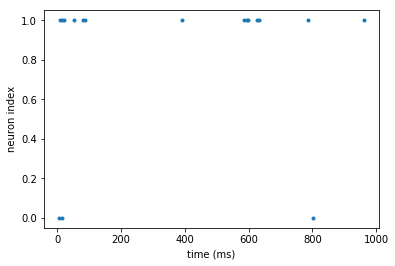

In [65]:
generate_tex_file(net,'tmp/net.tex')
create_pdf('tmp/net.tex','pdf/net')